In [7]:
# Imports.
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import cv2

In [2]:
# Read tiff.
tiff_path = 'data/image.tiff'
im = io.imread(tiff_path)

In [3]:
# Plot first frame.
def plot_frame(im, frame, filename=None):
    
    contrast = [2, 2, 2]  # Contrast in R, G, B
    
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.pcolorfast(np.clip(contrast * im[frame, :, :] / np.amax(im[frame, :, :]), 0, 1))
    ax.set_aspect('equal')
    ax.plot([4, 24], [4, 4], c='w', linewidth=4)
    ax.text(14, 6, '1 um', c='w', fontsize=9, horizontalalignment='center', weight='bold')
    
    if filename is not None:
        plt.savefig(filename, dpi=600)
    plt.show()
    plt.close()

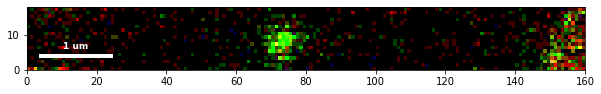

In [4]:
plot_frame(im, frame=0, filename='data/frame.pdf')

In [13]:
# Function for plotting timelapse of frames.
def plot_timelapse(im, filename=None):
    n_frames = im.shape[0]
    frame_freq = 5
    spacer = 5
    contrast = [0, 5, 0]  # Contrast in R, G, B; set to 0 to remove color

    timelapse = np.ones(((im.shape[1] + spacer) * int(1 + n_frames / frame_freq), im.shape[2], im.shape[3]))
    for i, frame in enumerate(im[::frame_freq]):
        loc = i * (im.shape[1] + spacer)
        timelapse[loc:loc+im.shape[1], :, :] = np.clip(contrast * im[i * frame_freq, :, :, :] / np.amax(im), 0, 1)
    timelapse = timelapse.swapaxes(0, 1)

    xticks = [im.shape[1] / 2 + i * (im.shape[1] + spacer) for i in range(1 + int(n_frames / frame_freq))]
    xticks_labels = [5 * frame_freq * i for i in range(len(xticks))]
    
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.pcolorfast(timelapse)
    ax.set_aspect('equal')
    ax.set_xlabel('t (s)')
    ax.set_yticks([])
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks_labels)
    ax.plot([14, 14], [4, 24], c='w', linewidth=4)
    ax.text(8, 14, '1 um', rotation=90, c='w', fontsize=9, verticalalignment='center', weight='bold')
    
    if filename is not None:
        plt.savefig(filename, dpi=600)
    plt.show()
    plt.close()

In [14]:
# Plot timelapse.
plot_timelapse(im, filename='data/timelapse.pdf')

In [11]:
# Function for exporting as video.
def save_video(im, filename):
    
    contrast = [5, 5, 5]  # Contrast in R, G, B
    output_img = np.clip(contrast * im / np.amax(im), 0, 1)
    
    size = (output_img.shape[2], output_img.shape[1])
    n_frames = output_img.shape[0]
    fps = 10
    out = cv2.VideoWriter(filename, cv2.VideoWriter_fourcc(*'FMP4'),
                          fps, (10 * size[0], 10 * size[1]), True)
    for i in range(n_frames):
        # data = np.random.randint(0, 256, size, dtype='uint8')
        frame = np.dstack([(255 * output_img[i, :, :, 2]).astype(np.uint8),
                           (255 * output_img[i, :, :, 1]).astype(np.uint8),
                           (255 * output_img[i, :, :, 0]).astype(np.uint8)])
        frame = cv2.resize(frame, (10 * size[0], 10 * size[1]), fx=0, fy=0, interpolation=cv2.INTER_NEAREST_EXACT)
        out.write(frame)
    out.release()

In [12]:
# Save video.
save_video(im, filename='data/video.avi')